In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
# from sklearn.metrics import roc_auc_score, roc_curve, auc

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, r2_score, roc_auc_score, roc_curve, auc
from IPython.display import display

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

In [2]:
#pip install -U imbalanced-learn

# Import Data

In [3]:
hour_raw = pd.read_csv('data/hour.csv')

# Explore

In [4]:
hour_raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Month and Season are duplicative - We'll keep the one that correlates more with cnt bike shares   -    looks like season has higher correlation.  

In [5]:
hour_raw.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


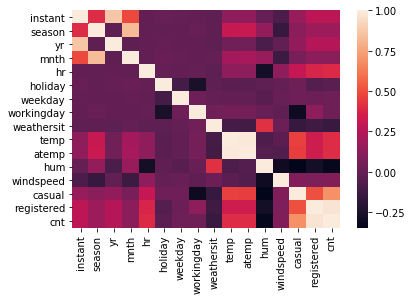

In [6]:
ax = sns.heatmap(hour_raw.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020981A85F28>,
      dtype=object)

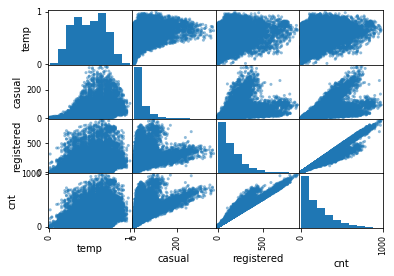

In [9]:
pd.plotting.scatter_matrix(hour_raw[['temp', 'casual','registered','cnt']])

## Check predictors/targets for normality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002098254D400>,
      dtype=object)

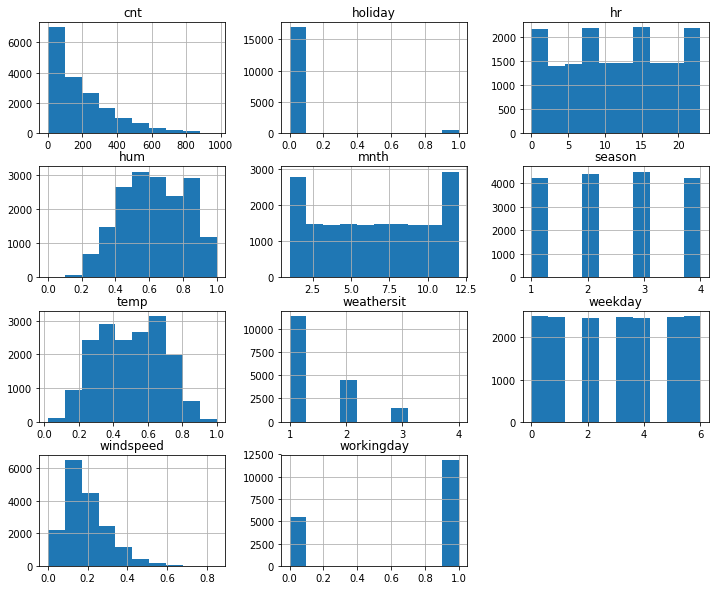

In [10]:
hour_raw[['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
         'windspeed', 'cnt']].hist(figsize=(12,10))

## Apply transformations to windspeed and cnt to bring closer to normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020982C430F0>,
      dtype=object)

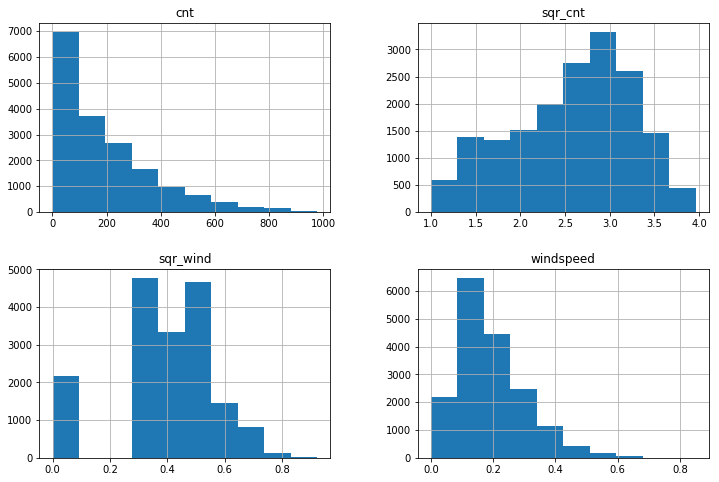

In [12]:
hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)
hour_raw['sqr_cnt'] = hour_raw.cnt**(1/5)
hour_raw[['windspeed', 'sqr_wind', 'sqr_cnt', 'cnt']].hist(figsize=(12,8))

# Linear Regression First Attempt - normalized hour data as norm_hr, hour is kept numeric

In [13]:
hour_raw = pd.read_csv('data/hour.csv')
#hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)

season_dummies = pd.get_dummies(data=hour_raw.season, prefix='season')
weathersit_dummies=pd.get_dummies(data=hour_raw.weathersit, prefix='weathersit')
weekday_dummies = pd.get_dummies(data=hour_raw.weekday, prefix='weekday')

hour_raw = pd.concat([hour_raw, season_dummies, weathersit_dummies, weekday_dummies], axis=1)
hour_raw.drop(columns=['season_1', 'weathersit_4', 'weekday_6'], inplace = True)

hour_raw['norm_hr'] = (hour_raw.hr-min(hour_raw.hr))/(max(hour_raw.hr)-min(hour_raw.hr))

lin_target = hour_raw.cnt
features_df = hour_raw.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'casual', 'registered', 'cnt'], axis=1)
predictor_int = sm.add_constant(features_df)

X_train, X_test, y_train, y_test = train_test_split(features_df, lin_target, test_size = 0.4)

model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\prayt\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     338.1
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:56:07   Log-Likelihood:                -66761.
No. Observations:               10427   AIC:                         1.336e+05
Df Residuals:                   10409   BIC:                         1.337e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday          3.4093     37.907      0.090      0.928     -70.895      77.714
weekday         14.5736     17.317      0.842      0.400     -19.371      48.519
workingday      32.6797     37.205      0.878      0.380     -40.249     105.609
temp           390.4290     12.438     31.390      0.000     366.048     414.810
hum           -214.7736      9.162    -23.441      0.000    -232.734    -196.813
windspeed       12.5607     12.558      1.000      0.317     -12.055      37.176
season_2        14.5857      5.131      2.843      0.004       4.528      24.643
season_3       -19.5428      6.590     -2.965      0.003     -32.461      -6.624
season_4        58.6687      4.475     13.111      0.000      49.898      67.440
weathersit_1   -53.2623    103.476     -0.515      0.607    -256.096     149.571
weathersit_2   -41.1558    103.468     -0.398      0.691    -243.972     161.660
weathersit_3   -76.1875    103.523     -0.736      0.462    -279.113     126.738
weekday_0       78.1084    103.984      0.751      0.453    -125.720     281.937
weekday_1       31.1932     49.611      0.629      0.530     -66.053     128.439
weekday_2       23.5541     32.396      0.727      0.467     -39.949      87.057
weekday_3        9.1541     15.273      0.599      0.549     -20.785      39.093
weekday_4       -8.0408      4.571     -1.759      0.079     -17.000       0.919
weekday_5      -19.7715     20.168     -0.980      0.327     -59.306      19.763
norm_hr        166.8618      5.084     32.822      0.000     156.896     176.827
==============================================================================
Omnibus:                     2642.281   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6295.057
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                       5.547   Cond. No.                     1.56e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Predictors -> season, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, spring, summer, fall

# linear regression nth attempt - changed hours to dummy vars, transform wind speed, transform target

## Test/train R^2 are very close, ~ .79 much higher now that we are using variable transforms and treating hour as categorical

In [17]:
hour_raw = pd.read_csv('data/hour.csv')

season_dummies = pd.get_dummies(data=hour_raw.season, prefix='season')
weathersit_dummies=pd.get_dummies(data=hour_raw.weathersit, prefix='weathersit')
weekday_dummies = pd.get_dummies(data=hour_raw.weekday, prefix='weekday')
hr_dummies = pd.get_dummies(data=hour_raw.hr, prefix='hr')

hour_raw = pd.concat([hour_raw, season_dummies, weathersit_dummies, weekday_dummies, hr_dummies], axis=1)
hour_raw.drop(columns=['season_1', 'weathersit_4', 'weekday_6','hr_0'], inplace = True)

hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)
hour_raw['sqr_cnt'] = hour_raw.cnt**(1/5)

lin_target = hour_raw.sqr_cnt
features_df = hour_raw.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'casual', 'registered', 'cnt', 'hr', 'sqr_wind', 'sqr_cnt'], axis=1)
predictor_int = sm.add_constant(features_df)

X_train, X_test, y_train, y_test = train_test_split(predictor_int, lin_target, test_size = 0.2)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
print('test r2', r2_score(y_test, model.predict(X_test))) 
print('train r2', r2_score(y_train, model.predict(X_train)))

#model.summary()

test r2 0.7975192606883361
train r2 0.7880608589331645


C:\Users\prayt\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Need to transform results back to original form (x^(1/5))^5 = x 
## Check residuals for normality - residuals appear approx normal

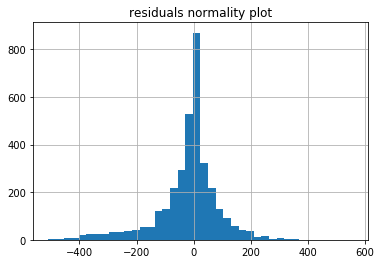

In [19]:
pd.DataFrame(model.predict(X_test)**5-y_test**5).hist(bins=40)
plt.title('residuals normality plot')
plt.savefig('images/lin_reg_resid_normality_plot.jpg')

# LOGISTIC REGRESSION

standard AUC for balanced: 0.8540100587599516


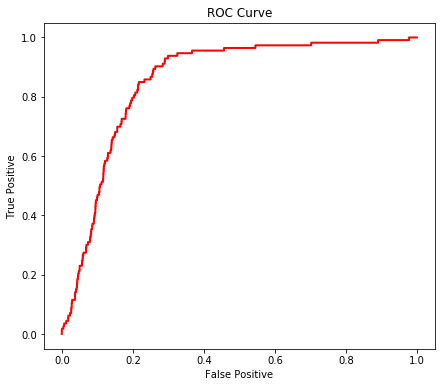

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

hour_raw = pd.read_csv('data/hour.csv')

season_dummies = pd.get_dummies(data=hour_raw.season, prefix='season')
weathersit_dummies=pd.get_dummies(data=hour_raw.weathersit, prefix='weathersit')
weekday_dummies = pd.get_dummies(data=hour_raw.weekday, prefix='weekday')
hr_dummies = pd.get_dummies(data=hour_raw.hr, prefix='hr')

hour_raw = pd.concat([hour_raw, season_dummies, weathersit_dummies, weekday_dummies, hr_dummies], axis=1)
hour_raw.drop(columns=['season_1', 'weathersit_4', 'weekday_6','hr_0'], inplace = True)

# modify wind/cnt to normalize
hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)
hour_raw['sqr_cnt'] = hour_raw.cnt**(1/5)

#create target var for Log Reg (more casual or not)
hour_raw['higher_casual'] = [1 if hour_raw['casual'][x]/hour_raw['cnt'][x] >= .5 else 0 for x in list(range(0,len(hour_raw)))] 


logR_target = hour_raw['higher_casual']
predictor_int_log = hour_raw.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'casual', 'registered', 'cnt', 'hr', 'sqr_wind', 'sqr_cnt', 'higher_casual'], axis=1)
predictor_int_log = features_df

X_train, X_test, y_train, y_test = train_test_split(predictor_int_log, logR_target, test_size = 0.3)

smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
logreg = LogisticRegression(fit_intercept = False, max_iter=400, C = 1e12,solver ='lbfgs') #Starter code
model_log = logreg.fit(X_train_resampled, y_train_resampled)

y_hat_test = logreg.predict(X_test)

y_score = model_log.decision_function(X_test)

preds = np.where(model_log.predict_proba(X_test)[:,1] > .70, 1, 0)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
print('standard AUC for {}: {}'.format('balanced', auc(fpr, tpr)))
lw = 2

fig = plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve {}'.format('balanced'))
plt.title('ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.savefig('images/log_roc_curve.jpg')

## Confusion matrix

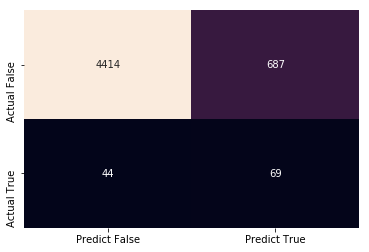

In [28]:
cm_df = pd.DataFrame(confusion_matrix(y_test, preds), index = ['Actual False', 'Actual True'],
             columns = ['Predict False', 'Predict True'])
sns.heatmap(cm_df, annot=True, cbar=False, fmt='d')
plt.savefig('images/confusion_matrix.jpg')

## Combine predictors and coefficients into one DataFrame and filter on top predictors

In [ ]:
log_reg_coefs = pd.DataFrame(X_train.columns, columns=['predictor'])
log_reg_coefs['log_coefs'] = model_log.coef_.transpose()
log_reg_coefs['transformed_coefs'] = math.e**log_reg_coefs.log_coefs
log_reg_coefs.loc[((log_reg_coefs['transformed_coefs']>2) | (log_reg_coefs[
    'transformed_coefs']<-2)) ,:].sort_values(by='transformed_coefs', ascending=False)
log_reg_coefs.sort_values(by='transformed_coefs', ascending=False)

In [ ]:
import math
from math import exp
from math import e
trials = pd.DataFrame(np.linspace(-2,2,11), columns=['tri'])
trials['results'] = math.e**trials.tri/(1+math.e**trials.tri)
trials
# prod.append
# pro = []
# for x in trials:
#     prod.append(exp(x)/(1+exp(x)))
# prod